# Ramen Rating Predictions

#### Rao Li

## Introduction

The website Ramen Raters rates all different types of ramen from all around the world. They're known for their thorough reviews and also wide range of ramen that they have reviewed. They allow you to download their list of every single ramen they have ever reviewed (https://www.theramenrater.com/resources-2/the-list/). This .xlsx file has information on their country of origin, name, brand, and whether or not they have ever put that ramen on their annual Top Ten list. Using these different types of features of ramen, I want to see if ratings of ramen can be predicted. Although the rating of ramen depends mainly on the flavor, I want to see if any of these features would be able to help predict the quality of the ramen. For example, maybe ramen from a certain country usually rates higher or something similar. 

## Data Preprocessing

First let's obtain the data and prepare it.

### Data Scraping

I downloaded the data xlsx file and placed it in the current folder. I then read the file in.

In [938]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split
from sklearn import metrics

data = pd.read_excel("ramen.xlsx")
data.head()

,Review #,Brand,Variety,Style,Country,Stars,Top Ten
0,3950,Nissin,Mocchi Cchi Hello Kitty Yakisoba,Cup,Japan,3.75,NaN
1,3949,Liitle Couples,Fish Head Casserole,Pack,Taiwan,5,NaN
2,3948,Yamasa,Artisanal Ramen Broth - Miso / Jongga Ramen Sari,Pack,South Korea,3.5,NaN
3,3947,Nissin,Cup Noodles Roasted Duck w/Sweet Onion Soup,Cup,Germany,3.25,NaN
4,3946,Nissin,Donbei Simple Taste Somen,Bowl,Japan,0,NaN


As you can see, there are 7 columns. Review # is simply an ID for each of the reviews and they are placed in descending order so there are a total of 3950 different ramens on this list. The rating is in the Stars column. The features of the ramen include the Brand, the Variety, Style, Country, and Top Ten. The Variety is the specific name of the ramen and the Style is the format that the ramen is presented in, such as Cup, Bowl, etc. Country is the country of origin for the ramen and Top Ten is a column of whether or not the website has ever put it in their annual top ten list in any year. If it hasn't ranked, the row has a NaN value in the Top Ten column.

### Data Cleaning

In [939]:
data.Brand = data.Brand.str.strip()
data.Brand = data.Brand.str.lower()

sorted_brands = data.Brand.unique()
sorted_brands.sort()
print(sorted_brands)
print(len(sorted_brands))

['1 to 3 noodles' '7 select' '7 select/nissin' '7-eleven / nissin' 'a-one'
 'a-sha' 'a-sha dry noodle' 'a1' 'abc' 'abc president' 'acecook' 'aces'
 'adabi' 'ah lai' 'aji-no-men' 'ajinatori' 'ajinomoto' 'alhami' 'amianda'
 'amino' "annie chun's" 'ao ba ba' 'aroi' 'asia gold' 'asian thai foods'
 'assi' 'atomy' 'authentically asian' 'azami' 'baijia' 'baixiang'
 'baixiang noodles' 'baltix' 'bamee' 'banzai' 'base foods' 'batchelors'
 'being blue' 'best wok' 'big bon' 'binh tay' 'blount' 'bon go jang'
 'bonasia' 'boss' 'bowlfull' 'boys & girls' 'buitoni'
 'burung layang terbang' "campbell's" 'canton' 'cao is starving'
 'cap atoom bulan' 'carjen' "chaudhary's wai wai" 'cheetos'
 "chef nic's noodles" 'chef woo' 'chencun' 'chering chang' 'chewy'
 'chikara' 'chil kab farm products' 'chillies brand' 'china best'
 "ching's secret" 'chitato' 'chongqing suanlabao food co., ltd.'
 'chorip dong' 'choripdong' 'choumama' 'chuan wei wang' 'chuanbei'
 'cigala' 'cintan' 'cj cheiljedang' 'coco 2.0' 'conimex

In [940]:
data.loc[data.Brand=="abc president", "Brand"] = "abc"
data.loc[(data.Brand.str.contains("nissin")) & (data.Brand.str.contains("7")), "Brand"] = "nissin"
data.loc[data.Brand.str.contains("baixiang"), "Brand"] = "baixiang"
data.loc[data.Brand=="fantastic", "Brand"] = "fantastic noodles"
data.loc[data.Brand=="fashion food", "Brand"] = "fashion foods"
data.loc[data.Brand=="goku-uma", "Brand"] = "goku uma"
data.loc[data.Brand=="higashi", "Brand"] = "higashimaru"
data.loc[data.Brand=="hua feng noodle expert", "Brand"] = "hua feng"
data.loc[data.Brand=="kiki noodle", "Brand"] = "kiki"
data.loc[data.Brand=="liitle couples", "Brand"] = "little couples"
data.loc[data.Brand=="little couples q noodle", "Brand"] = "little couples"
data.loc[data.Brand=="lishan food manufacturing", "Brand"] = "lishan"
data.loc[(data.Brand.str.contains("mamee")) & (data.Brand.str.contains("shinsegae")), "Brand"] = "mamee/shinsegae"
data.loc[data.Brand=="master kong", "Brand"] = "kang shi fu"
data.loc[data.Brand.str.contains("nakaki"), "Brand"] = "nakaki"
data.loc[(data.Brand.str.contains("nissin")) & (data.Brand.str.contains("miojo")), "Brand"] = "nissin"
data.loc[data.Brand=="paldo vina", "Brand"] = "paldo"
data.loc[data.Brand=="peyoung", "Brand"] = "peyang"
data.loc[data.Brand=="prima taste", "Brand"] = "prima"
data.loc[data.Brand=="samurai ramen", "Brand"] = "samurai"
data.loc[data.Brand=="sakurai foods", "Brand"] = "sakurai"
data.loc[data.Brand=="samyang foods", "Brand"] = "samyang"
data.loc[data.Brand=="sao tao", "Brand"] = "sau tao"
data.loc[data.Brand=="seven-eleven", "Brand"] = "7-eleven"
data.loc[data.Brand=="7 select", "Brand"] = "7-eleven"
data.loc[data.Brand=="seven & i", "Brand"] = "7-eleven"
data.loc[data.Brand=="sugakiya foods", "Brand"] = "sugakiya"
data.loc[data.Brand=="taihodien", "Brand"] = "taihodien restaurant"
data.loc[data.Brand=="tasty ly", "Brand"] = "tasty.ly"
data.loc[data.Brand=="thien houng foods", "Brand"] = "thien huong food"
data.loc[data.Brand=="three meters noodles", "Brand"] = "three meters"
data.loc[data.Brand.str.contains("unif"), "Brand"] = "tung-i"
data.loc[data.Brand=="uni-president", "Brand"] = "tung-i"
data.loc[data.Brand=="world o noodle", "Brand"] = "world o' noodle"
data.loc[data.Brand=="yamamoto seifun", "Brand"] = "yamamoto"

print(len(data.Brand.unique()))

536


Cleaning up the brands took a really long time. I first trimmed them so there weren't leading or trailing whitespaces and then made them all lowercase. Since the dataset is maintained manually by people, there's bound to be some mistakes like uneven capitalization for the same brand. I then printed them out in sorted order so it was easier to see the brands that were similar and could possibly be duplicates of each other.

Afterwards, I went through the entire list of brands and for the ones that sounded like they were the same, I checked on the Ramen Raters site for the original reviews for the logos of the brand. If they had the same logo but were spelled different in the title, I changed them to be the same. Some of these were simple. For example, "ABC President brand" is the same as "ABC" and "Fantastic" was the same as "Fantastic Noodles". There were also typos such as "liitle couples" which was meant to be "little couples". There were ones I knew from my own knowledge, like how Master Kong is the same brand as Kang Shi Fu because I've had this type before (Shi Fu in Chinese translates to Master so I made a guess and then checked on their site).

There were also a bunch of 7-eleven ones such as 7 select, seven & i that were all from 7-eleven so I changed them to be the same. Unif and Tung-I are also the same brand, along with Uni-President. As a note, there are some entries with "No Brand" but that is actually the brand name of those ramens. The entries with "No Name" do not have a specific brand name but they are all from the same series so "No Name" might as well be their name since it groups them together. There are no NaN values within the brand names.

There are now 536 brand names as compared to the 577 of before.

In [941]:
sorted_countries = data.Country.unique()
sorted_countries.sort()
print(sorted_countries)
print(len(sorted_countries))

['Australia' 'Bangladesh' 'Brazil' 'Cambodia' 'Canada' 'China' 'Colombia'
 'Dubai' 'Estonia' 'Fiji' 'Finland' 'France' 'Germany' 'Ghana' 'Holland'
 'Hong Kong' 'Hungary' 'India' 'Indonesia' 'Ireland' 'Israel' 'Italy'
 'Japan' 'Malaysia' 'Mexico' 'Myanmar' 'Nepal' 'Netherlands' 'New Zealand'
 'Nigeria' 'Pakistan' 'Peru' 'Philippines' 'Phlippines' 'Poland'
 'Portugal' 'Russia' 'Russian Federation' 'Sarawak' 'Serbia' 'Singapore'
 'Souh Korea' 'South Korea' 'Spain' 'Sweden' 'Taiwan' 'Thailand' 'UK'
 'USA' 'Ukraine' 'United Kingdom' 'United States' 'Vietnam']
53


In [942]:
data.loc[data.Country=="Phlippines", "Country"] = "Philippines"
data.loc[data.Country=="Souh Korea", "Country"] = "South Korea"
data.loc[data.Country=="USA", "Country"] = "United States"
data.loc[data.Country=="UK", "Country"] = "United Kingdom"
data.loc[data.Country=="Russian Federation", "Country"] = "Russia"
print(len(data.Country.unique()))

48


Similar to the brand names, I went through the countries to see if there were any errors. There were some standardization issues such as UK being listed as both UK and United Kingdom when they refer to the same place. There were typos as well such as "Souh Korea" which was meant to be "South Korea". I fixed all of these errors so now, instead of 53 separate countries, there are 48.

In [943]:
data.Stars.unique()

array([3.75, 5, 3.5, 3.25, 0, 1, 0.25, 3, 4.75, 4.25, 2.25, 0.5, 4, 4.5,
       2.5, 2.75, 2, 1.5, 1.75, 1.25, 0.75, 'NS', 'NR', '3.5/2.5',
       '4.5/5', '5/2.5', '4.25/5', 'Unrated', 1.1, 2.1, 0.9, 3.1, 4.125,
       3.125, 2.125, 2.9, 0.1, 2.8, 3.7, 3.4, 3.6, 2.85, 2.3, 3.2, 3.65,
       1.8], dtype=object)

While I was going through the Star ratings, I saw that there were "NS", "NR", and "Unrated". These are all unusable rows since my goal for this project is focused on predicting the ratings of these ramens based on different features. The unrated ramens are not useful datapoints. I went on to delete these rows with these values as the star ratings.

There are also rows where the rating is in the format of "float/float". I went on to their website to check what these meant and these are also joint reviews of ramens with certain broth combinations. The first value is the rating for the ramen and the second is a rating for the broth. For these, the Variety column is also in the format of "___ + ____". The first string before the + would be the name of the ramen and the string afterwards is the name of the broth. For these rows, I took the first float for the rating of the ramen since I only care about ramen ratings and also the first string in the Variety column. This will create some duplicates for ramens since there are separate entries previously which had the same ramen but combined with different broths.

I also changed the Stars column into floats now that there aren't any other types of values for the column.

In [944]:
data.Stars = data.Stars.astype(str)
for index, row in data.loc[data.Stars.str.contains("/")].iterrows():
    data.loc[index, "Variety"] = row.Variety[:row.Variety.index(' +')]
    data.loc[index, "Stars"] = row.Stars[:row.Stars.index('/')]
    print(row.Variety)

df = data.drop(data[data.Stars=='Unrated'].index)
df = df.drop(df[df.Stars=='NS'].index)
df = df.drop(df[df.Stars=='NR'].index)

df["Stars"] = pd.to_numeric(df["Stars"], downcast="float")
df.Stars.unique()

Laksa Rice Noodles + Thai Curry & Lime Broth
Pad Thai Rice Noodles + Vietnamese Pho Broth
Hakata Ramen + Thai Curry & Lime Broth
Pad See Ew Rice Noodleds + Spicy Szechuan Broth
Pad See Ew Rice Noodles + Vietnamese Pho Broth


array([3.75 , 5.   , 3.5  , 3.25 , 0.   , 1.   , 0.25 , 3.   , 4.75 ,
       4.25 , 2.25 , 0.5  , 4.   , 4.5  , 2.5  , 2.75 , 2.   , 1.5  ,
       1.75 , 1.25 , 0.75 , 1.1  , 2.1  , 0.9  , 3.1  , 4.125, 3.125,
       2.125, 2.9  , 0.1  , 2.8  , 3.7  , 3.4  , 3.6  , 2.85 , 2.3  ,
       3.2  , 3.65 , 1.8  ], dtype=float32)

In [945]:
df = df.drop(df[df.Variety=="Pad See Ew Rice Noodleds"].index)

In [946]:
print(df.Style.unique())

['Cup' 'Pack' 'Bowl' 'Tray' 'Box' 'Restaurant' 'Can' 'Bar']


There were no NaN values for the Style column so nothing was changed or dropped because of this column.

Next, I checked the Top Ten column which is NaN if the ramen has never been in the Top Ten for any year. If it has, the column is a string with the year when it was in the Top Ten and also the ranking.

In [947]:
df["Top Ten"]

0       NaN
1       NaN
2       NaN
3       NaN
4       NaN
       ... 
3945    NaN
3946    NaN
3947    NaN
3948    NaN
3949    NaN
Name: Top Ten, Length: 3942, dtype: object

In [948]:
df["Top_Ten_Bool"] = df["Top Ten"].notna()
df[df["Top_Ten_Bool"]==True]["Top Ten"].unique()

array(['2016 #10', '2016 #1', '2016 #8', '2016 #5', '2016 #9', '2016 #7',
       '2015 #10', '2015 #7', '2015 #4', '2015 #9', '2015 #6', '2015 #1',
       '2013 #10', '2015 #8', '2014 #7', '2014 #4', '2014 #9', '2014 #10',
       '2014 #8', '2014 #5', '2014 #6', '2014 #1', '2013 #1', '2013 #2',
       '2013 #4', '\n', '2013 #9', '2013 #3', '2012 #10', '2012 #7',
       '2012 #5', '2012 #3', '2012 #6', '2012 #9', '2012 #1', '2012 #2',
       '2013 #6', '2012 #4'], dtype=object)

In [949]:
df.loc[df["Top Ten"]=="\n", "Top_Ten_Bool"] = False
print(df[df.Top_Ten_Bool==True]["Top Ten"].unique())
df["Top Ten"] = df["Top Ten"].astype(str)

['2016 #10' '2016 #1' '2016 #8' '2016 #5' '2016 #9' '2016 #7' '2015 #10'
 '2015 #7' '2015 #4' '2015 #9' '2015 #6' '2015 #1' '2013 #10' '2015 #8'
 '2014 #7' '2014 #4' '2014 #9' '2014 #10' '2014 #8' '2014 #5' '2014 #6'
 '2014 #1' '2013 #1' '2013 #2' '2013 #4' '2013 #9' '2013 #3' '2012 #10'
 '2012 #7' '2012 #5' '2012 #3' '2012 #6' '2012 #9' '2012 #1' '2012 #2'
 '2013 #6' '2012 #4']


I created a new column of booleans called Top_Ten_Bool that is True if the ramen has been in Top Ten and is False if not. I did this by setting that new column to be True when the Top Ten column isn't NaN. I checked the True columns again to see if there was anything I was missing and found that there were rows that only had a \n newline on them and weren't actually a ranking so I changed those rows in the boolean column to be false.

In [950]:
for index, row in df[df["Top_Ten_Bool"]==True].iterrows():
    df.loc[index, "Ranking_If_Top"] = row["Top Ten"][row["Top Ten"].index('#')+1:]
print(df[df.Top_Ten_Bool==True])

      Review #             Brand  \
1986      1964              mama   
2003      1947             prima   
2025      1925             prima   
2043      1907             prima   
2122      1828     tseng noodles   
2261      1689      wugudaochang   
2312      1638  a-sha dry noodle   
2333      1617           mykuali   
2365      1585            carjen   
2429      1521          maruchan   
2442      1508             mamee   
2450      1500           mykuali   
2479      1471              mama   
2484      1466              mama   
2600      1350             mamee   
2620      1330   sapporo ichiban   
2642      1308          nongshim   
2648      1302              mama   
2679      1271             prima   
2752      1198           samyang   
2767      1183             paldo   
2863      1087           mykuali   
2958       992             prima   
2959       991             prima   
3016       934          nongshim   
3127       823             paldo   
3235       715           ind

In [951]:
df.drop(["Top Ten"], axis=1, inplace=True)
df.loc[df["Ranking_If_Top"].isna(), "Ranking_If_Top"] = 0
df.drop(["Top_Ten_Bool"], axis=1, inplace=True)

I want to maintain both the fact of whether or not the ramen ranked but also the exact ranking it placed so I created another column called Ranking_If_Top and put the substring of the ranking number into this column. The rankings in the Top Ten column are formatted as "[year] #[ranking]" so I took the substring after the "#" for the Ranking_If_Top column. I didn't keep the year that the ramens placed in Top Ten since they don't really matter much in the type of analysis I want to do. There also isn't any other year or time related data in this dataset so it wouldn't have fit in. The rows where it didn't rank were just NaN.

At this point, I decided that if the rows where it didn't rank in the Top Ten were just going to be NaN in this new column, it basically functions the same as the previously existing Top Ten column so I made the NaN values as 0. The ranking is 0 if it didn't place in any year. Since this column now accounts for both the ranking and whether or not the ramen ranked, I deleted the original Top Ten column and also the Top_Ten_Bool column I had previously created that now don't really have a purpose since their data is already in the Ranking_If_Top column.

## Data Visualization

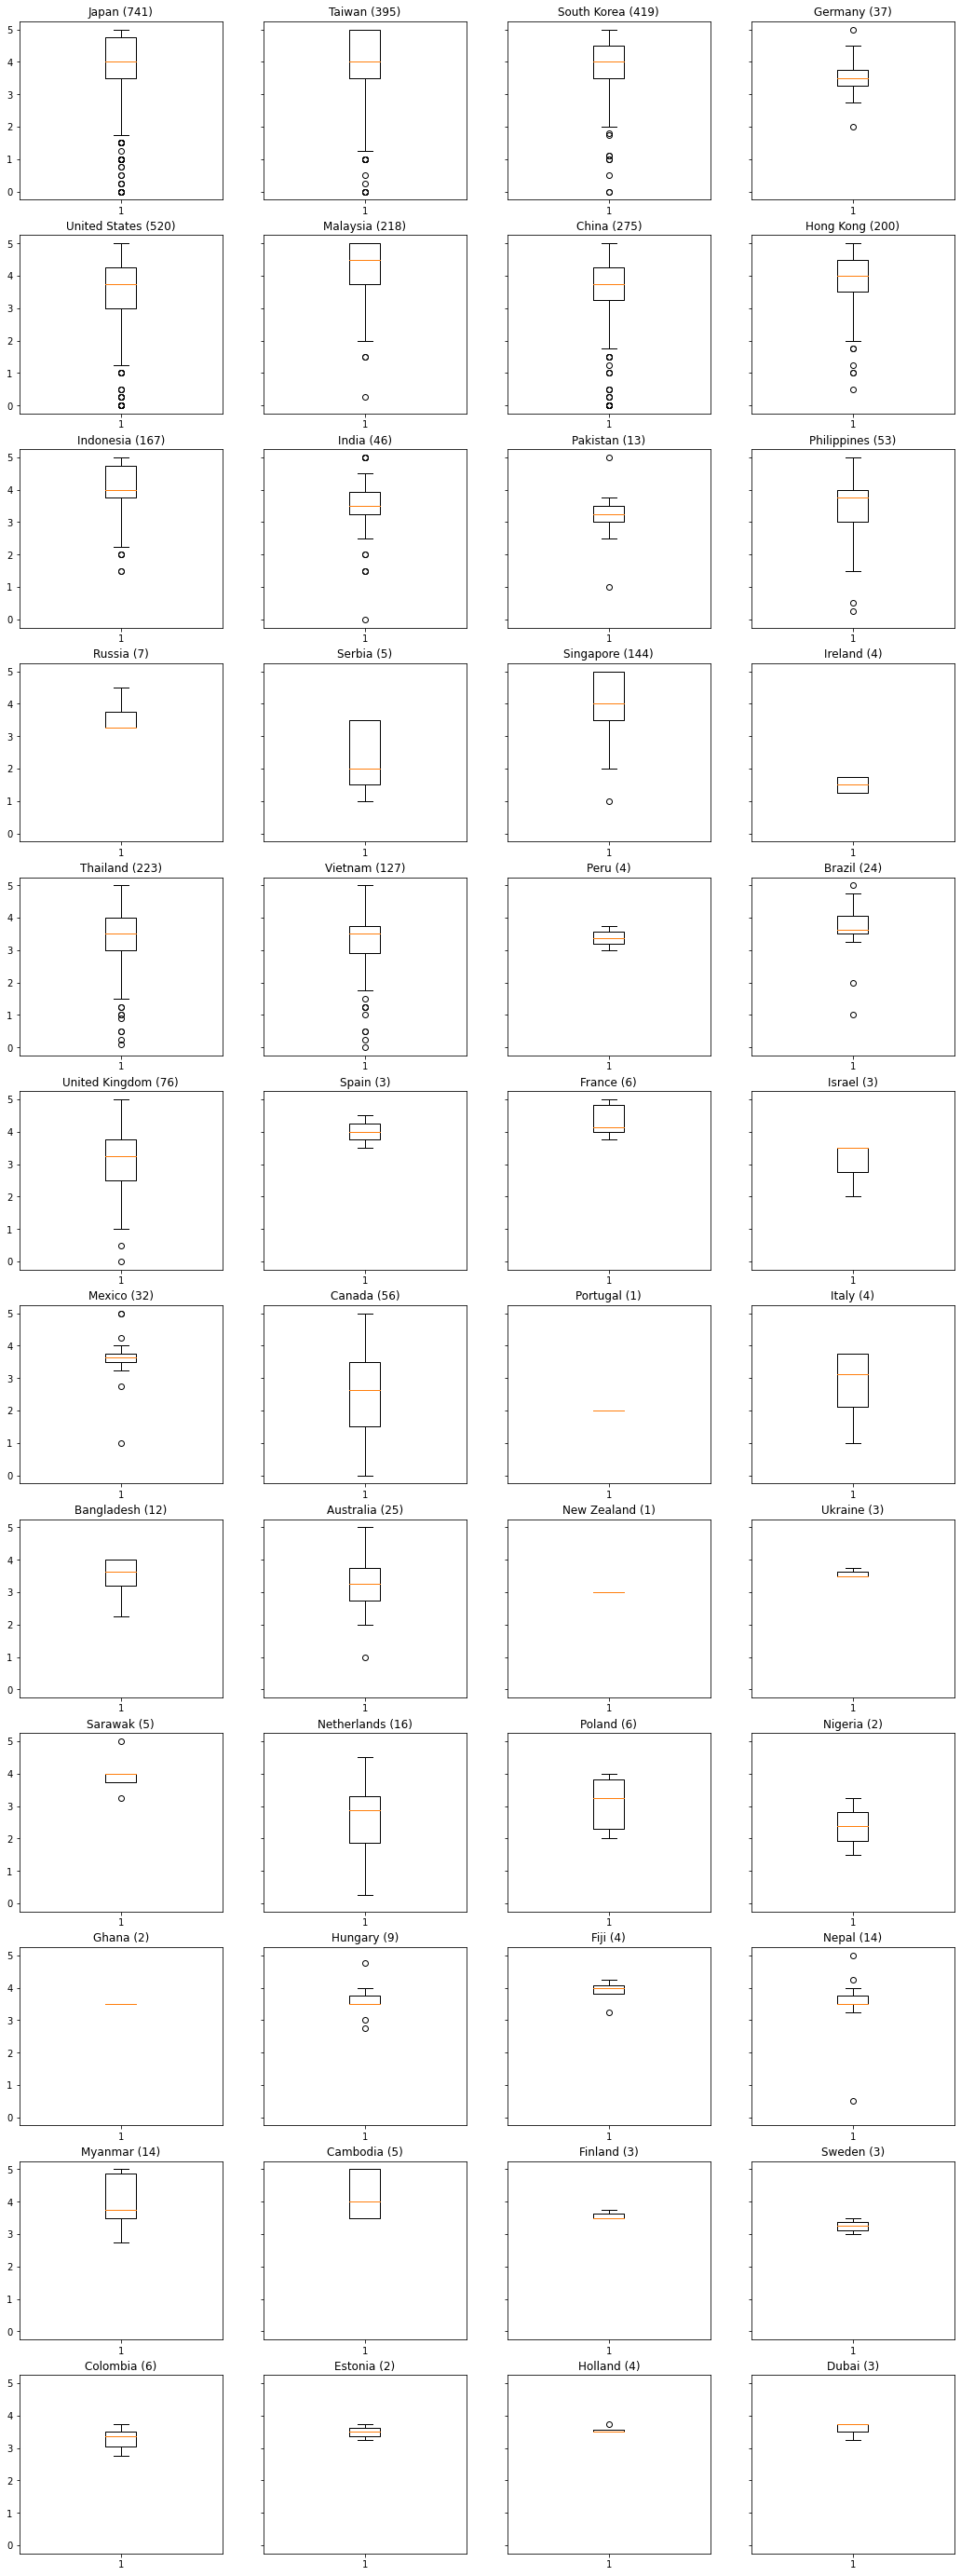

In [952]:
fig, ax = plt.subplots(12, 4, sharey=True, figsize=(18,50))

row=0
col=0
for country in df.Country.unique():
    ax[row, col].title.set_text(country + " (" + str(len(df[df["Country"]==country])) + ")")
    ax[row, col].boxplot(df[df["Country"]==country]["Stars"])
    if col==3:
        row += 1
        col = 0
    else:
        col += 1

In [953]:
print(df[df["Country"]=="Japan"]["Stars"].describe())
print(df[df["Country"]=="South Korea"]["Stars"].describe())

count    741.000000
mean       3.888833
std        1.009235
min        0.000000
25%        3.500000
50%        4.000000
75%        4.750000
max        5.000000
Name: Stars, dtype: float64
count    419.000000
mean       3.874583
std        0.841508
min        0.000000
25%        3.500000
50%        4.000000
75%        4.500000
max        5.000000
Name: Stars, dtype: float64


I created boxplots to show the distribution of the ratings for each of the different countries. I included the number of entries there were for each country in their titles to give more of an idea for how many values went into the distribution.

From this, we can see that within the five countries that have the most entries in this list (Japan - 741, USA - 520, South Korea - 419, Taiwan - 395, China - 275), the Japan and South Korea plots have the shortest distance from their Q1 to max. Both of their Q1s are above 3, at the 3.5 mark and the maxes are both 5. They also have the same median of 4. Within those two though, Japan's has the shortest distance from Q3 to max. Japan has a Q3 of 4.75 while South Korea has a Q3 of 4.5. This means that Japan's last quarter has a range of 0.25 while South Korea's largest quarter has a larger range of 0.5.

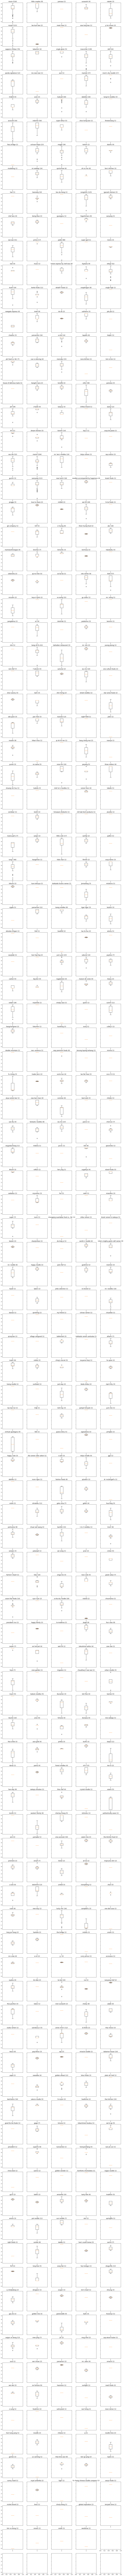

In [954]:
fig, ax = plt.subplots(108, 5, sharey=True, figsize=(18,400))

row=0
col=0
for brand in df.Brand.unique():
    ax[row, col].title.set_text(brand + " (" + str(len(df[df["Brand"]==brand])) + ")")
    ax[row, col].boxplot(df[df["Brand"]==brand]["Stars"])
    if col==4:
        row += 1
        col = 0
    else:
        col += 1

I also did a set of box plots for the ratings based on Brand. However, since there are so many brands and a majority of them don't have a lot of entries, it's hard to compare the significance of the brand in determining the rating, at least from these box plots.

total entries: 3942
Cup: 742
Pack: 2195
Bowl: 760
Tray: 171
Box: 69
Restaurant: 3
Can: 1
Bar: 1


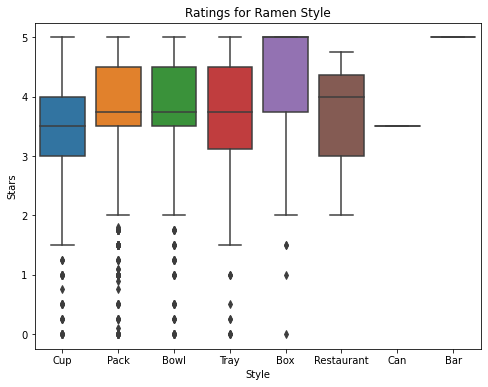

In [955]:
fig, ax = plt.subplots(figsize=(8, 6))

ax.set_title("Ratings for Ramen Style")
sns.boxplot(y="Stars", x="Style", data=df)

print("total entries: " + str(len(df)))
print("Cup: " + str(len(df[df.Style=="Cup"])))
print("Pack: " + str(len(df[df.Style=="Pack"])))
print("Bowl: " + str(len(df[df.Style=="Bowl"])))
print("Tray: " + str(len(df[df.Style=="Tray"])))
print("Box: " + str(len(df[df.Style=="Box"])))
print("Restaurant: " + str(len(df[df.Style=="Restaurant"])))
print("Can: " + str(len(df[df.Style=="Can"])))
print("Bar: " + str(len(df[df.Style=="Bar"])))

Next I created a shared graph for the boxplots of the ratings based on the Style. I was originally going to do this type of visualization for the Country and Brand ones but there were too many countries and brands that the graph simply looked cluttered having them all in the same row next to each other. Style only has 8 different types so they work well next to each other in the same plot. I also printed out the number of entries for each of the different Styles, printed in the order of the types in the plot.

Pack style has the most entries, taking up more than half of the total datapoints (2195 of 3942). From the graph, we also see that, along with Cup and Bowl, it has the shortest interquartile range if we ignore Can and Bar since those only have 1 entry each. Pack and Bowl's Q1, Median, and Q3 are all higher than Cup's. Interestingly enough, Pack and Bowl actually have the exact same values for all of the calculations within the box plot.

No Rank: 3905
Rank 1: 5
Rank 2: 2
Rank 3: 2
Rank 4: 4
Rank 5: 3
Rank 6: 4
Rank 7: 4
Rank 8: 3
Rank 9: 5
Rank 10: 5


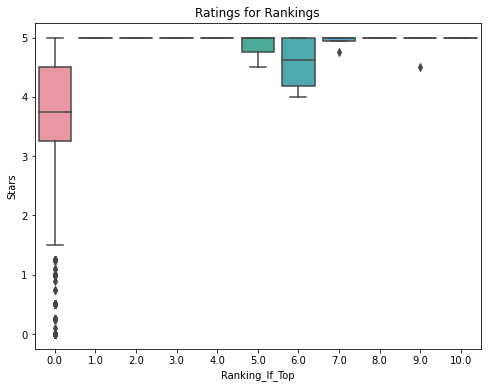

In [956]:
fig, ax = plt.subplots(figsize=(8, 6))

df["Ranking_If_Top"] = pd.to_numeric(df["Ranking_If_Top"], downcast="float")

ax.set_title("Ratings for Rankings")
sns.boxplot(y="Stars", x="Ranking_If_Top", data=df)

print("No Rank: " + str(len(df[df.Ranking_If_Top==0])))
print("Rank 1: " + str(len(df[df.Ranking_If_Top==1])))
print("Rank 2: " + str(len(df[df.Ranking_If_Top==2])))
print("Rank 3: " + str(len(df[df.Ranking_If_Top==3])))
print("Rank 4: " + str(len(df[df.Ranking_If_Top==4])))
print("Rank 5: " + str(len(df[df.Ranking_If_Top==5])))
print("Rank 6: " + str(len(df[df.Ranking_If_Top==6])))
print("Rank 7: " + str(len(df[df.Ranking_If_Top==7])))
print("Rank 8: " + str(len(df[df.Ranking_If_Top==8])))
print("Rank 9: " + str(len(df[df.Ranking_If_Top==9])))
print("Rank 10: " + str(len(df[df.Ranking_If_Top==10])))

Finally, I did a box plot side by side visualization for the feature Ranking_If_Top. Rank 0 clearly has the biggest range since it has the most entries and because the actual ranked ones are a very small minority within the entries. The ranked ones have from 2 to 5 entries per rank.

Within these that do have a ranking, all of their star ratings were greater than or equal to 4 stars. Ranks 1, 2, 3, 4, 8, and 10 actually were all 5 stars. Surprisingly, the fluctuation that does happen within the ranks happens in the middle numbers such as 5, 6, 7 rather than at the lower ranked ones. It makes sense that these ranked ones are all higher stars since they have to beat everything else the team at the website tried that year in order to be in the year's list. Fluctuation also makes sense since there may be different features that go into a Top Ten's list as compared to a specific rating. When giving a Star rating, the rating is only for the dish alone. When ranking them, it's relative and there may be other aspects the reviewers consider.

## Regression and Machine Learning

Next, we will move on to creating a regressor that will try to predict the star rating based on the different features. This will be a regressor and not a classifier because the rating is a continuous value between 0 and 5. These are float ratings and not simply integer ratings.

First I will change all of the features into categories. In order to do so, I go through the unique values for each feature and assign them to specific integers starting from 0. I do this for every single feature and place them into a new dataframe called df_features. This dataframe will not have the Stars column because that is the target and not the features.

I will actually be dropping the Ranking_If_Top column for the machine learning features. This is because the ranking is done after the ramen is reviewed. The ranking itself isn't an affecting feature in determining the star rating of the ramen. I'm also doing this data analysis to try to create a system that can be used on other types of ramen which have not already been reviewed by Ramen Raters. For those, they will for sure not have a Top Ten ranking.

In [957]:
category = 0
for s in df.Style.unique():
    df.loc[df.Style==s, "Style_Categorical"] = category
    category += 1

category = 0
for c in df.Country.unique():
    df.loc[df.Country==c, "Country_Categorical"] = category
    category += 1

category = 0
for b in df.Brand.unique():
    df.loc[df.Brand==b, "Brand_Categorical"] = category
    category += 1
    
category = 0
for v in df.Variety.unique():
    df.loc[df.Variety==v, "Variety_Categorical"] = category
    category += 1
    
df_new = df.drop(columns=["Review #", "Brand", "Variety", "Style", "Country", "Ranking_If_Top"])
df_new["Stars"] = df_new["Stars"] / 5
print(df_features.head())

df_features = df_new.drop(columns=["Stars"])

   Style_Categorical  Country_Categorical  Brand_Categorical  \
0                0.0                  0.0                0.0   
1                1.0                  1.0                1.0   
2                1.0                  2.0                2.0   
3                0.0                  3.0                0.0   
4                2.0                  0.0                0.0   

   Variety_Categorical  
0                  0.0  
1                  1.0  
2                  2.0  
3                  3.0  
4                  4.0  


I also dropped the column Review # since it's basically an ID for each of the entries. To standardize the targets, I divided the Stars column by 5 since it's in the range of 0 to 5. It will be easier to interpret the metrics later if the range of the targets are from 0 to 1, which the Stars now are.

### Decision Tree Regressor

I first created a DecisionTreeRegressor with a max depth of 2. This is to prevent overfitting because if you don't set a max depth, the decision tree will be expanded until the leaves are pure. I used holdout validation with 70% of the data for training and 30% for testing.

In [966]:
X = df_features
Y = df_new["Stars"]

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=0)

clf = DecisionTreeRegressor(random_state=0, max_depth=2)
clf = clf.fit(X_train, Y_train)

Y_pred = clf.predict(X_test)
df_new["predict_tree"] = clf.predict(df_features)

pd.set_option('display.max_rows', 3000)

df_new = df_new[["Style_Categorical", "Country_Categorical", "Brand_Categorical", 
                 "Variety_Categorical", "Stars", "predict_tree"]]
print(df_new)

mse = metrics.mean_squared_error(Y_test, Y_pred)
print("Decision Tree\nMean Squared Error: " + str(mse))
rmse = metrics.mean_squared_error(Y_test, Y_pred, squared=False)
print("Root Mean Squared Error: " + str(rmse))
mae = metrics.mean_absolute_error(Y_test, Y_pred)
print("Mean Absolute Error: " + str(mae))

      Style_Categorical  Country_Categorical  Brand_Categorical  \
0                   0.0                  0.0                0.0   
1                   1.0                  1.0                1.0   
2                   1.0                  2.0                2.0   
3                   0.0                  3.0                0.0   
4                   2.0                  0.0                0.0   
...                 ...                  ...                ...   
3945                2.0                 17.0               83.0   
3946                1.0                 16.0               50.0   
3947                1.0                 16.0               50.0   
3948                1.0                 16.0               50.0   
3949                1.0                  4.0              533.0   

      Variety_Categorical  Stars  predict_tree  
0                     0.0   0.75      0.779163  
1                     1.0   1.00      0.779163  
2                     2.0   0.70      0.779163  

For the performance metrics, I used Mean Squared Error, Root Mean Squared Error, and Mean Absolute Error. These values are all quite low which means that the predictions of the decision tree regressor worked quite well for the testing data. The best value for all three of these is 0 which would indicate that every prediction was correct.

### KNN Neighbors Regressor

I also used a KNN Neighbors regressor with n neighbors as 5.

In [963]:
neigh = KNeighborsRegressor(n_neighbors=5)
neigh = neigh.fit(X_train, Y_train)

Y_pred = neigh.predict(X_test)
df_new["predict_neigh"] = neigh.predict(df_features)

print(df_new)

mse = metrics.mean_squared_error(Y_test, Y_pred)
print("KNN Neighbors\nMean Squared Error: " + str(mse))
rmse = metrics.mean_squared_error(Y_test, Y_pred, squared=False)
print("Root Mean Squared Error: " + str(rmse))
mae = metrics.mean_absolute_error(Y_test, Y_pred)
print("Mean Absolute Error: " + str(mae))

      Style_Categorical  Country_Categorical  Brand_Categorical  \
0                   0.0                  0.0                0.0   
1                   1.0                  1.0                1.0   
2                   1.0                  2.0                2.0   
3                   0.0                  3.0                0.0   
4                   2.0                  0.0                0.0   
...                 ...                  ...                ...   
3945                2.0                 17.0               83.0   
3946                1.0                 16.0               50.0   
3947                1.0                 16.0               50.0   
3948                1.0                 16.0               50.0   
3949                1.0                  4.0              533.0   

      Variety_Categorical  Stars  predict_tree  predict_neigh  
0                     0.0   0.75      0.779163           0.66  
1                     1.0   1.00      0.779163           0.66  
2  

The MSE, RMSE, and MAE for the KNN Neighbors are also quite low though they are higher than the metrics we got for the decision tree which means that, for our test data at least, this prediction model didn't work as well as the decision tree did.

## Conclusion

While the rating of a specific type of ramen is based on the actual quality and flavor of the ramen, we see from here that features like the format the ramen is presented in (Style), the country, Brand, and the Variety can be helpful in giving us an initial prediction of what the ramen will be like. I hope to run this regressor on future datapoints of other types of ramen to see if it can be applied more broadly and accurately.